## 딥러닝 한번에 끝내기
### 3. 딥러닝 구조와 모델

### 3-1 들어가며

![](./img03/01.png)

![](./img03/02.png)

### 3-2 딥러닝 구조와 레이어

1. 딥러닝 구조
모델구조

케라스에서 제공하는 API들의 구성도를 살펴보면, 크게 Model API와 Layer API가 있고 필요한 모듈들을 Modules API를 호출해서 사용합니다. 딥러닝 모델은 여러 레이어들로 구성되어 있습니다.


![](./img03/03.png)

레이어들을 사용해서 모델을 구성한다.


2. 레이어

먼저 딥러닝을 사용하는데 필요한 라이브러리인 TensorFlow와 keras를 임포트합니다. 또한 케라스(Keras)의 레이어를 사용할 수 있도록 임포트합니다.

In [117]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

본 강의에서는 코어 레이어만 학습한다.

레이어는 강의 교안외에도 다양하게 존재함

![](./img03/04.png)

딥러닝은 여러 개의 레이어(Layer)로 구성되어 있으며, 기본적으로 입력층(Input Layer), 은닉층(Hidden Layer), 출력층(Output Layer) 으로 구분됩니다. 레이어는 딥러닝 모델을 구성하는 핵심 데이터 구조로서 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈입니다.

![](./img03/05.png)
인풋객체에서는 shape를 지정해줘야 하며 데이터 유형도 지정해줘야 한다.

완전연결계층은 모든 노드가 연결되어 있음

flatten은 2차원을 1차원으로 바꿔줌

activation은 활성화 함수를 지정해줌 (Dense에 포함될수도 있음)



#### input 객체

딥러닝 모델의 입력을 정의할 때 사용하는 Input 객체는 입력 데이터의 모양인 shape와 예상되는 데이터 유형인 dtype 등을 포함하고 있습니다.

In [118]:
keras.Input(shape=(8,), dtype=tf.int32)

<KerasTensor: shape=(None, 8) dtype=int32 (created by layer 'input_35')>

In [119]:
keras.Input(shape=(28, 28), dtype=tf.float32)

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_36')>

In [120]:
#Input 객체는 배치 크기를 batch_size로 지정할 수 있고, name을 통해서 이름을 지정할 수도 있습니다.
keras.Input(shape=(28, 28), dtype=tf.float32, batch_size=16)

<KerasTensor: shape=(16, 28, 28) dtype=float32 (created by layer 'input_37')>

In [121]:
keras.Input(shape=(28, 28), dtype=tf.float32, batch_size=16, name='input')

<KerasTensor: shape=(16, 28, 28) dtype=float32 (created by layer 'input')>

#### Dense 레이어

Dense 레이어는 완전연결계층(Fully-Connected Layer)으로 노드수(유닛수)를 지정하면 생성됩니다. Dense 레이어에 대한 자세한 내용은 다음 링크를 참조하면 됩니다. https://keras.io/api/layers/core_layers/dense/

In [122]:
layers.Dense(10)

In [123]:
# 레이어에 name을 통해 이름을 지정하여 레이어간의 구분이 가능합니다.
layers.Dense(10, name='layer1')

In [124]:
# 레이어에서 사용할 활성화 함수(activation)를 지정하여 생성하는 것이 가능합니다.
layers.Dense(10, activation='softmax')

In [125]:
#레이어에 유닛수와 활성화 함수 그리고 이름까지 지정하여 사용하는 것도 가능합니다.
layers.Dense(10, activation='relu', name='Dense Layer')

In [126]:
# 랜덤으로 값을 만들고, 생성한 레이어에 그 값을 입력으로 사용한 뒤에 레이어 가중치 값과 결과 값을 확인해 봅시다.
inputs = tf.random.uniform(shape=(5, 2))
print(inputs)
layer = layers.Dense(10, activation='relu')
outputs = layer(inputs)
print(layer.weights)
print(layer.bias)
print(outputs)

tf.Tensor(
[[0.49626637 0.43209958]
 [0.41632676 0.29525352]
 [0.6953623  0.5952796 ]
 [0.14033532 0.5145724 ]
 [0.11094022 0.10338807]], shape=(5, 2), dtype=float32)
[<tf.Variable 'dense_88/kernel:0' shape=(2, 10) dtype=float32, numpy=
array([[ 0.68532056,  0.5088114 , -0.2429083 , -0.1522184 ,  0.5550712 ,
        -0.55488515, -0.2986588 ,  0.23183125,  0.28860426,  0.06097519],
       [-0.6238054 ,  0.27286917, -0.34251395, -0.3703049 , -0.34561983,
         0.50399524, -0.5107372 , -0.34276682,  0.33744806, -0.16195178]],
      dtype=float32)>, <tf.Variable 'dense_88/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]
<tf.Variable 'dense_88/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>
tf.Tensor(
[[0.07055549 0.37041265 0.         0.         0.12612098 0.
  0.         0.         0.28903574 0.        ]
 [0.10113657 0.29239738 0.         0.         0.1290455  0.
  0.      

#### Activation 레이어

활성화 함수는 이전 레이어의 결과값을 변환하여 다른 레이어로 전달하는 역할을 하는데, 크게 선형 활성화 함수(Linear activation function)와 비선형 활성화 함수(Non-linear activation function)로 구분할 수 있습니다. 다만 딥러닝에서는 선형 활성화 함수를 사용하면 다층 구조를 사용하는 의미가 없기 때문에 모델 표현력을 위해서 비선형 활성화 함수 를 사용합니다.

케라스의 Dense 레이어에서 미리 활성화 함수를 지정할 수도 있지만, 필요에 따라 별도의 Activation 레이어를 만들어줄 수 있습니다.

Keras에서 제공하는 활성화 함수(activation function)의 종류: https://keras.io/api/layers/activations/

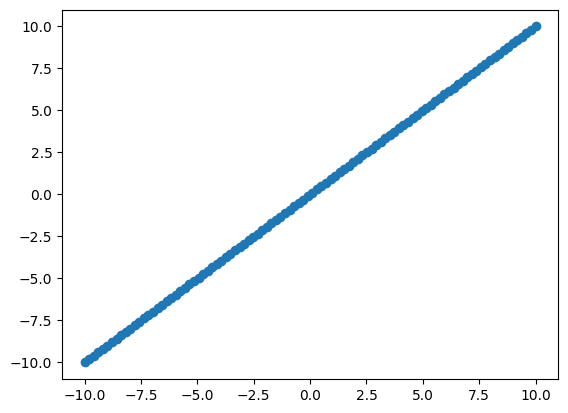

In [127]:
# Activation 레이어가 어떤식으로 동작하는지 살펴보기 위해서 -10부터 10 사이의 수 가운데 100개의 값을 입력 데이터로 사용해 봅시다.
import numpy as np
import matplotlib.pyplot as plt

input = np.linspace(-10, 10, 100)
x = np.linspace(-10, 10, 100)
plt.scatter(x, input)
plt.show()

![](./img03/06.png)

<시그모이드함수>
활성화 함수 중에서도 오래전부터 사용되던 시그모이드(sigmoid) 함수는 다음과 같이 표현됩니다.

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

시그모이드 함수는 주로 확률 예측 모델에 자주 사용되며, 출력값이 0과 1 사이로 나타납니다. 그러다보니 0과 1 사이에서 포화(saturate)되는 문제가 있습니다. 즉, 입력값이 작아도 출력값이 0 이하가 될 수 없고, 커져도 1 이상이 될 수 없기 때문에 훈련 시간이 오래걸리고, 그래디언트(gradient)가 0에 가까워져서 가중치 업데이트가 발생하지 않게 됩니다.

시그모이드 함수는 0과 1에서 포화되는 문제가 있음 (0이거나 1이거나)

0과 1로 제한이 되다보니 훈련시간 오래 걸림

베니싱그레디언트 발생


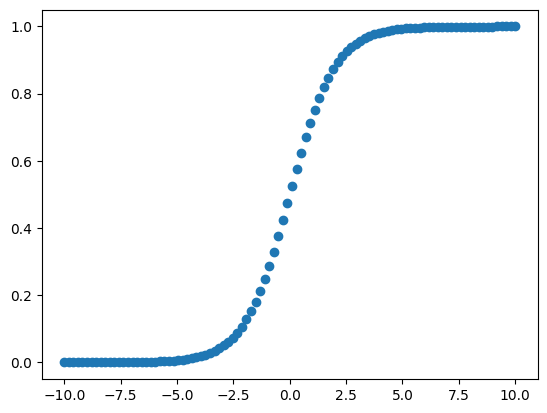

In [128]:
layer = layers.Activation('sigmoid')
output = layer(input)

plt.scatter(x, output)
plt.show()

<하이퍼볼릭 탄젠트 함수>

하이퍼볼릭 탄젠트(tanh, Hyperbolic tangent) 함수는 다음과 같이 표현됩니다.

$$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

하이퍼볼릭 탄젠트 함수는 0을 중심으로 -1과 1 사이의 값이 나타납니다. 일반적으로 시그모이드 함수보다는 빨리 훈련되지만, 여전히 -1과 1 사이에서 포화되는 문제가 있습니다.

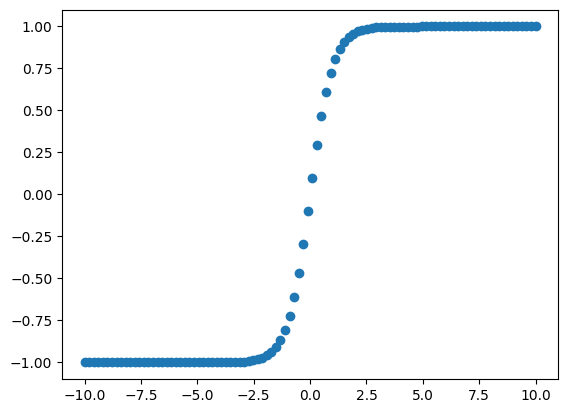

In [129]:
layer = layers.Activation('tanh')
output = layer(input)

plt.scatter(x, output)
plt.show()

![](./img03/07.png)

<relu>

최근에 가장 많이 사용하는 활성화 함수인 ReLU(Rectified Linear Unit)는 다음과 같이 표현됩니다.

$$f(x) = max(0, x)$$

ReLU 함수의 출력값은 0부터 무한대까지의 범위의 값을 가지므로 하이퍼볼릭 탄젠트 함수보다 몇 배는 더 빠르게 훈련됩니다. 다만 ReLU 함수 출력값이 0이 중심이 아니고, 학습률(learning rate)이 크면 ReLU를 사용한 노드에서 출력이 0으로만 나온다는 문제가 있습니다.

특정기준 이하는 다 0이기 때문에  출력을 0으로 만들어버림

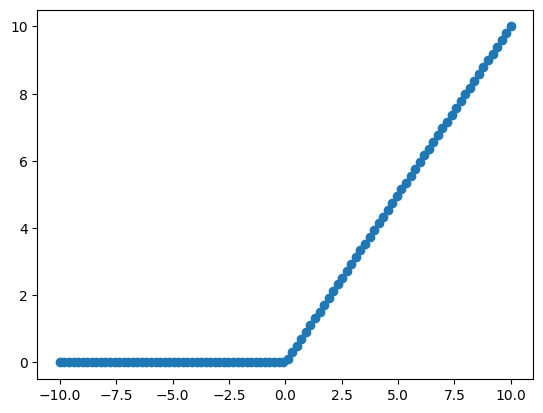

In [130]:
layer = layers.Activation('relu')
output = layer(input)

plt.scatter(x, output)
plt.show()

<Leaky Relu>

Leaky ReLU 함수는 ReLU 함수의 문제점, 즉 노드 출력을 0으로만 하던 문제를 해결하였으며 다음과 같이 표현됩니다.

$$f(x) = max(0.01x, x)$$

relu의 문제점을 보완한 것. Leaky ReLU 함수는 노드 출력을 0이 아닌 아주 작은 음수값으로 출력하게 만들어 해결하였습니다.

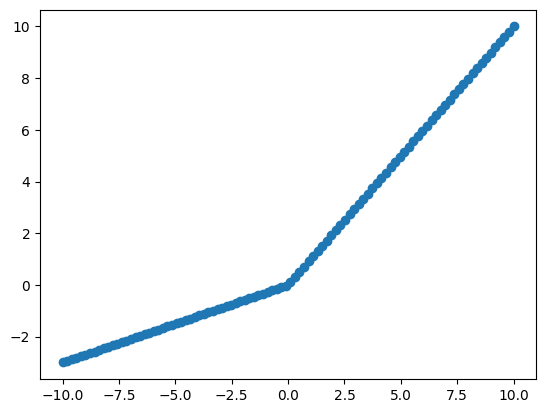

In [131]:
layer = layers.LeakyReLU()
output = layer(input)

plt.scatter(x, output)
plt.show()

#### ELU

ELU(Exponential Linear Unit) 함수는 ReLU가 중심점이 0이 아니고, 노드 출력을 0으로만 하던 문제를 해결한 활성화 함수이며, 다음과 같이 표현됩니다.

$$f(x) = \begin{cases} x & \text{if } x > 0 \\ \alpha(e^x - 1) & \text{if } x \leq 0 \end{cases}$$

ELU 함수는 0 이하에서는 exponential 연산이 수행되므로 계산 비용이 높아지는 단점이 있습니다.

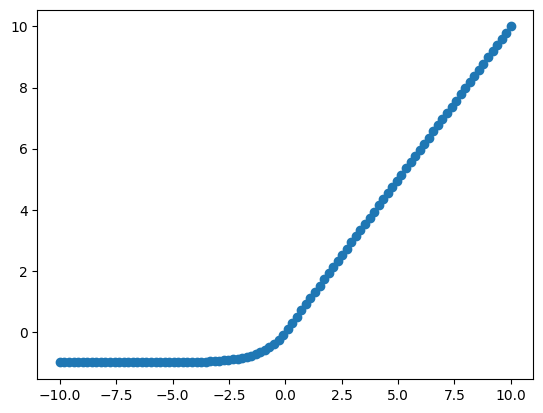

In [132]:
layer = layers.ELU()
output = layer(input)

plt.scatter(x, output)
plt.show()

![](./img03/08.png)

0이하에서는 exponential 연산 진행

#### Flatten 레이어

Flatten 레이어는 배치 크기(또는 데이터 크기)를 제외하고 데이터를 1차원 형태로 평평하게 변환합니다.

In [133]:
inputs = keras.Input(shape=(28, 28, 1))
layer = layers.Flatten(input_shape=(28, 28, 1))(inputs)
print(layer.shape)

(None, 784)


Q.입력값 (224, 224, 1)를 Flatten 레이어에 넣으면 어떤 크기의 1차원 형태 데이터가 나올까요?

입력값이 (224, 224, 1)인 경우, Flatten 레이어는 224 x 224 x 1 = 50176 크기의 1차원 형태 데이터를 출력합니다. Flatten 레이어는 입력된 다차원 배열을 하나의 차원으로 평탄화(flatten)하여 1차원 배열 형태로 반환합니다. 따라서, 입력 데이터의 크기와 상관없이 모든 입력값에 대해 고정된 크기의 1차원 배열을 출력합니다.


In [134]:
inputs = keras.Input(shape=(224, 224, 1))
layer = layers.Flatten()(inputs)
print(layer.shape)

(None, 50176)


### 3-3 딥러닝 모델

딥러닝 모델을 구성하는 방법은 1) Sequential() 함수를 이용한 Sequential API 방법과 2) Functional API를 이용하는 방법, 그리고 3) Subclassing API를 이용하는 방법이 있습니다.

![](./img03/09.png)

단순 모델일때는 Sequential 모델을 사용하면 됨

복잡한 모델일때는 Functional API를 사용해야함

Subclassing API는 Functional API를 사용할 수 없는 특수한 경우에 사용

먼저 케라스(Keras)에서 모델과 유틸리티들을 사용할 수 있도록 `models`, `utils`를 임포트하겠습니다.

In [135]:
from tensorflow.keras import models, utils

#### Sequential API
Sequential API를 이용하는 방법은 모델이 순차적인 구조로 진행할 때 사용하는 간단한 방법입니다. 다만 이 방법은 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없습니다.

Sequential API를 이용한 방법 중 첫번째는 Sequential 객체 생성 후,add()를 이용하여 사용할 레이어들을 추가하는 방법입니다.

In [136]:
model = models.Sequential()
model.add(layers.Input(shape=(28, 28)))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 28, 300)           8700      
                                                                 
 dense_90 (Dense)            (None, 28, 100)           30100     
                                                                 
 dense_91 (Dense)            (None, 28, 10)            1010      
                                                                 
Total params: 39810 (155.51 KB)
Trainable params: 39810 (155.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


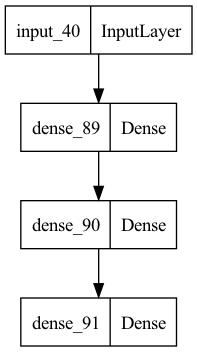

In [137]:
# plot_model() 함수를 통해 딥러닝 모델의 모습을 시각적으로 확인할 수 있습니다.
utils.plot_model(model)